# Heart Disease Prediction

### Import libraries

Let's import all neccesary libraries. The main library that used in that work is `pandas`. `Pandas` help to create and work with dataframes and datasets. 

For visualization I use library `matplotlib` and subpackage `pyplot`. 

For implementing Machine Learning models and processing of data, I use the `sklearn` library.

For removing warnings that produce by training model, I use the library `warnings`

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from scipy import stats
import numpy as np

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Read data

Read file 'heart.csv' to local variable 'data'

In [5]:
data = pd.read_csv("heart.csv", sep=",")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### 1. Analize attributes of dataset/ Understanding the data

__--__ Firstly, We should to look on _correlation matrix_. It would help to understand dependency between the attributes. 

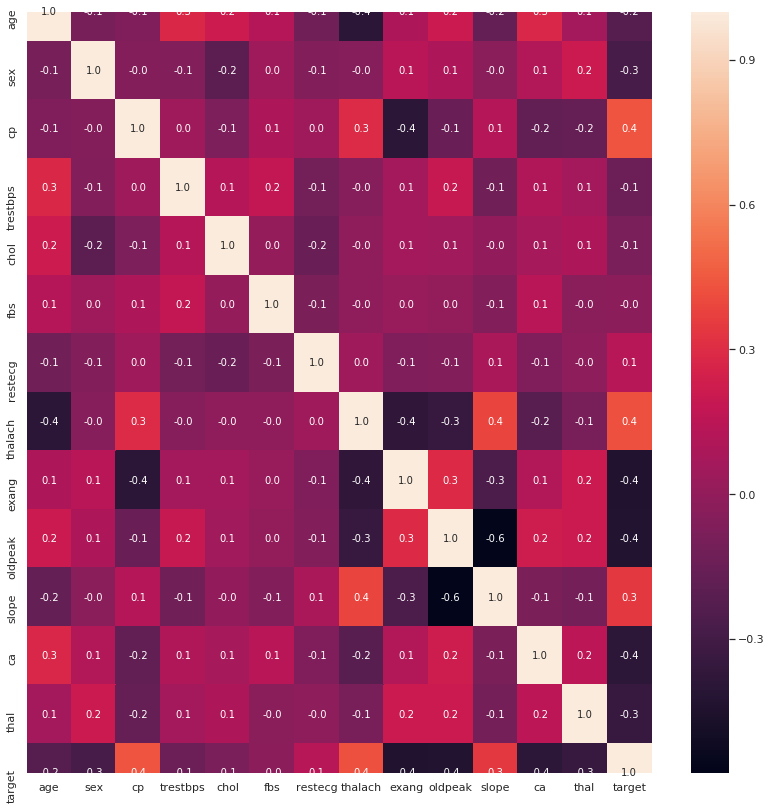

In [6]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

From this correlation matrix, we can understand that all data is unique and not strongly correlated with each other.

It’s also worth noting that some attributes are highly correlated with the target - ch(_chest pain_), thalch, slope

__--__ Secondly, let's look on target balanced plot. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use

In [7]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

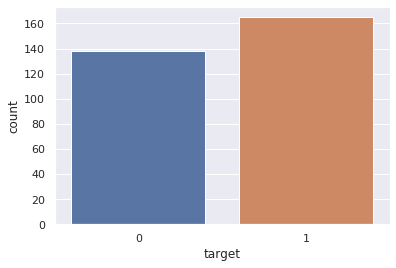

In [8]:
sns.countplot(x="target", data=data)
plt.show()

__--__ Find _missing value_

In [9]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


__--__ The last point of that topic is to look close on data in our dataset. Displayed table describe values that present in data. There are import mean, min and max value of each presented attributes.

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Also, let's point that minimum age is 29, and maximum - 77.

### 2. Statistics

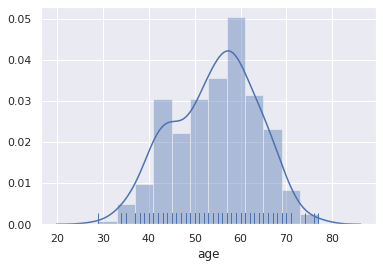

In [28]:
sns.distplot(data['age'],rug=True)
plt.show()

__Sex distribution in data__

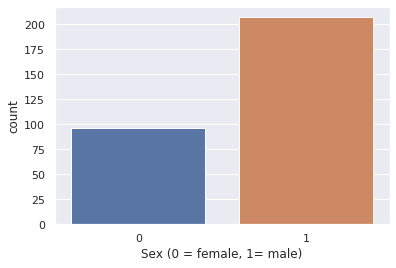

In [29]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

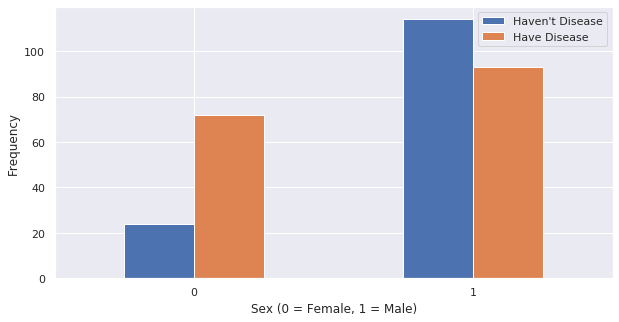

In [30]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(10,5))
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

_For more information about Statistics look on 'Stats.ipynb' file. In that file have been described the main statistic data distibution and target dependencies for all attributes that is presented in dataset._

### 3. Outliers

In statistics, an outlier is an observation point that is distant from other observations. The outliers can be a result of a mistake during data collection or it can be just an indication of variance in your data.

For detecting outliers in such case I use z-score method. The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. 


In [12]:
z = np.abs(stats.zscore(data))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [13]:
threshold = 3
res = np.where(z > 3)
print("Length:", len(res[0]), ":", len(res[1]))
print("Rows:",res[0])
print("Columns:",res[1])

Length: 16 : 16
Rows: [ 28  48  85  92 158 163 164 204 220 221 223 246 248 251 272 281]
Columns: [ 4 12  4 11 11 11 11  9  4  9  3  4  3 11  7 12]


_Number of outliers : 16_

__Save outliers to separate dataset__

In [14]:
outliers_row = []
for j in res[0]:
    r = []
    for i in data.columns:
        r.append(data[i][j])
    outliers_row.append(r)

In [15]:
outliers_data = pd.DataFrame(data=outliers_row, columns = data.columns)
outliers_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
2,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
3,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
4,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
5,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
6,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
7,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
8,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
9,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [16]:
outliers_data.to_csv("outliers.csv", )

__--__ Remove outliers from main dataset 

In [17]:
print("Data shape with outliers:", data.shape)

Data shape with outliers: (303, 14)


In [18]:
data = data.drop(res[0],axis=0)

In [19]:
print("Data shape without outliers:", data.shape)

Data shape without outliers: (287, 14)


### 4. Filter data by age

In this work we are interested in prediction heart disease for young people, so we interested in subset where ages are between 28 and 35

In [20]:
age_row = []
for i in range(len(data['age'])):
    if i not in res[0] and data['age'][i]>=28 and data['age'][i]<=45:
        age_row.append(i)

In [21]:
print(len(age_row))

59


In [22]:
age = []
for j in age_row:
    r = []
    for i in data.columns:
        r.append(data[i][j])
    age.append(r)

In [23]:
age_data = pd.DataFrame(data=age, columns=data.columns)
age_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
5,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
6,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
7,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
8,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
9,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1


In [24]:
age_data.to_csv('young_age.csv', index=False)

### 5. Data Proccess For All Data 

__--__ Creating Dummy Variables

In [25]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [26]:
data.shape

(287, 29)

__--__ Fit data to Standart Scaler

In [27]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [28]:
data.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,0.954638,0.823925,-0.250907,0.008668,1.200521,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,-1.909660,-0.060392,0.119943,1.652290,2.312868,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,-1.468998,-0.060392,-0.883533,0.985957,0.366261,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,0.183481,-0.649938,-0.185463,1.252490,-0.189913,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
4,0.293646,-0.649938,2.388672,0.586157,-0.375304,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
5,0.293646,0.529153,-1.145310,-0.080177,-0.560695,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,0
6,0.183481,0.529153,1.079790,0.141934,0.273565,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
7,-1.138503,-0.649938,0.403534,1.030379,-0.931478,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
8,-0.257180,2.415697,-0.992607,0.541735,-0.468000,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
9,0.293646,1.118698,-1.668863,1.074801,0.551652,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


### 6. Train Model For All Data

#### Prepare data to train

In [29]:
x = data.drop(['target'], axis=1)
y = data['target']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic regression

In [31]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
print("Training accuracy: {}".format(model_lr.score(x_train, y_train)))
predicted_lr = model_lr.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_lr)))

Training accuracy: 0.8820960698689956
Testing accuracy:  0.7758620689655172


In [33]:
probabilities_lr = model_lr.predict_proba(x_test)
probabilities_lr

array([[0.06411938, 0.93588062],
       [0.89894894, 0.10105106],
       [0.02160716, 0.97839284],
       [0.98309854, 0.01690146],
       [0.34926149, 0.65073851],
       [0.87749687, 0.12250313],
       [0.93695793, 0.06304207],
       [0.12892846, 0.87107154],
       [0.40801791, 0.59198209],
       [0.67403869, 0.32596131],
       [0.30527232, 0.69472768],
       [0.70288664, 0.29711336],
       [0.03490892, 0.96509108],
       [0.50635221, 0.49364779],
       [0.51899153, 0.48100847],
       [0.95248281, 0.04751719],
       [0.91599362, 0.08400638],
       [0.98551438, 0.01448562],
       [0.04974313, 0.95025687],
       [0.99384129, 0.00615871],
       [0.99641772, 0.00358228],
       [0.05778162, 0.94221838],
       [0.37415624, 0.62584376],
       [0.03559235, 0.96440765],
       [0.66126709, 0.33873291],
       [0.13120059, 0.86879941],
       [0.02337258, 0.97662742],
       [0.84211364, 0.15788636],
       [0.00787478, 0.99212522],
       [0.24870021, 0.75129979],
       [0.

#### Decision Tree Classifier

This classifier creates a decision tree based on which, it assigns the class values to each data point.


In [34]:
dt_scores = []
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

In [35]:
print(dt_scores)

[0.7241379310344828, 0.7758620689655172, 0.6896551724137931, 0.8103448275862069, 0.6551724137931034, 0.6551724137931034, 0.7068965517241379, 0.6551724137931034, 0.6724137931034483, 0.5862068965517241, 0.6379310344827587, 0.7241379310344828, 0.7586206896551724, 0.8275862068965517, 0.7241379310344828, 0.6724137931034483, 0.7758620689655172, 0.7241379310344828, 0.7758620689655172, 0.7068965517241379, 0.7758620689655172, 0.7068965517241379, 0.7241379310344828, 0.7068965517241379, 0.7413793103448276, 0.7241379310344828, 0.7758620689655172, 0.6896551724137931]


In [36]:
print("Final score:", dt_scores[-1])

Final score: 0.6896551724137931


In [37]:
print("The best score:", max(dt_scores))

The best score: 0.8275862068965517


Also, I can plot a line graph and see the effect of the number of features on the model score. 

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

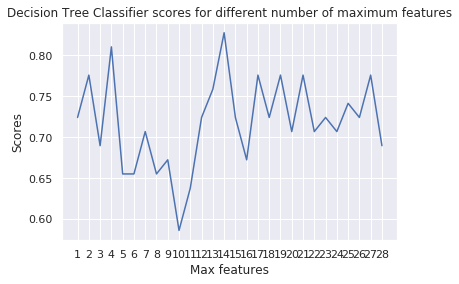

In [38]:
x_ax = [i for i in range(1, len(x.columns) + 1)]
plt.plot(x_ax, dt_scores)

    
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')

plt.title('Decision Tree Classifier scores for different number of maximum features')

#### K Neighbors Classifier

This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point.

In [39]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

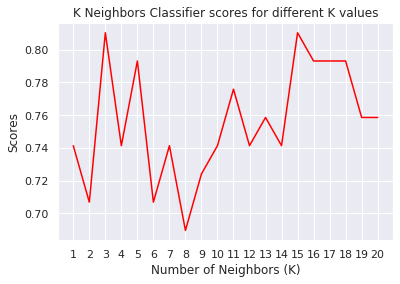

In [40]:
x_axes = [k for k in range(1, 21)]
plt.plot(x_axes, knn_scores, color = 'red')
    
plt.xticks([i for i in range(1, 21)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

In [41]:
print("Best score:", knn_scores[15])

Best score: 0.7931034482758621


### 7. Data Proccess For Young Age Data 

__--__ Creating Dummy Variables

In [42]:
age_data = pd.get_dummies(age_data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [43]:
age_data.shape

(59, 28)

__--__ Fit data to Standart Scaler

In [45]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
age_data[columns_to_scale] = standardScaler.fit_transform(age_data[columns_to_scale])

In [46]:
age_data.head(10)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,-1.215571,0.510719,0.404738,1.127937,2.884886,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,-0.039855,0.510719,-0.606734,0.363014,0.758548,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
2,0.841933,-0.294961,0.690588,0.414009,-0.659010,1,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0.548003,2.122080,0.338772,0.312019,0.859802,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
4,0.841933,0.510719,0.030933,0.719978,-0.253994,1,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
5,0.254074,1.316400,-0.122987,0.668983,-0.659010,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
6,-0.333784,1.316400,-0.716676,0.668983,0.758548,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
7,-0.039855,-1.503481,-0.738665,0.159035,-0.659010,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8,0.841933,0.510719,-0.276906,1.178932,-0.659010,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
9,1.135862,-1.584049,-0.518780,-0.860862,2.378615,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0


### 7. Predict heart disease for young age 

In [47]:
x = age_data.drop(['target'], axis=1)
y = age_data['target']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Logistic regression

In [49]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print("Training accuracy: {}".format(model_lr.score(x_train, y_train)))
predicted_lr = model_lr.predict(x_test)
print("Testing accuracy:  {}".format(metrics.accuracy_score(y_test, predicted_lr)))

Training accuracy: 0.9574468085106383
Testing accuracy:  0.9166666666666666


In [51]:
probabilities_lr = model_lr.predict_proba(x_test)
probabilities_lr

array([[0.10210387, 0.89789613],
       [0.10125859, 0.89874141],
       [0.01658004, 0.98341996],
       [0.10497973, 0.89502027],
       [0.01174876, 0.98825124],
       [0.84583739, 0.15416261],
       [0.74044948, 0.25955052],
       [0.33834178, 0.66165822],
       [0.83709316, 0.16290684],
       [0.0040244 , 0.9959756 ],
       [0.47652142, 0.52347858],
       [0.19172983, 0.80827017]])

#### Decision Tree Classifier

This classifier creates a decision tree based on which, it assigns the class values to each data point.


In [52]:
dt_scores = []
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 42)
    dt_classifier.fit(x_train, y_train)
    dt_scores.append(dt_classifier.score(x_test, y_test))

In [53]:
print(dt_scores)

[0.6666666666666666, 0.9166666666666666, 0.8333333333333334, 0.8333333333333334, 0.75, 0.75, 0.9166666666666666, 0.9166666666666666, 0.8333333333333334, 0.75, 0.9166666666666666, 0.8333333333333334, 0.9166666666666666, 0.8333333333333334, 0.75, 0.9166666666666666, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.5833333333333334, 0.9166666666666666, 0.8333333333333334, 0.8333333333333334]


In [54]:
print("Final score:", dt_scores[-1])

Final score: 0.8333333333333334


In [55]:
print("The best score:", max(dt_scores))

The best score: 0.9166666666666666


Also, I can plot a line graph and see the effect of the number of features on the model score. 

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

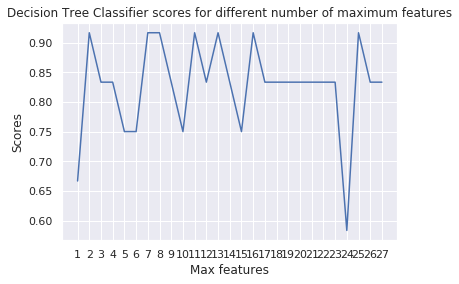

In [56]:
x_ax = [i for i in range(1, len(x.columns) + 1)]
plt.plot(x_ax, dt_scores)

    
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')

plt.title('Decision Tree Classifier scores for different number of maximum features')

#### K Neighbors Classifier

This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point.

In [57]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

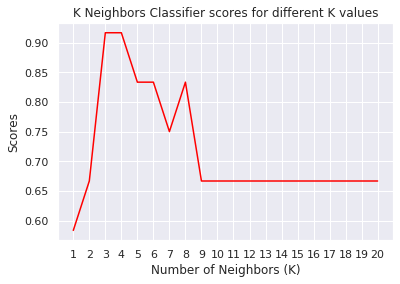

In [58]:
x_axes = [k for k in range(1, 21)]
plt.plot(x_axes, knn_scores, color = 'red')
    
plt.xticks([i for i in range(1, 21)])

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

plt.title('K Neighbors Classifier scores for different K values')

In [60]:
print("Best score:", knn_scores[3])

Best score: 0.9166666666666666
